# <font color=blue>__Deprivation and Venue Data Analysis of London districts - Varnan Goodwin__</font>

### Applied Data Science Capstone by IBM/Coursera

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

## Introduction: Business Problem <a name="introduction"></a>

This project aim to analyse and identify most deprived neighbourhoods for development in London using data science methodology and machine learning techniques. 

The results and recommendation of the projects will be useful for Charities, NGOs and local authorities to identify most deprived neighbourhoods and initiate, 
organise and carry out appropriate development projects for the affected areas

## Data <a name="data"></a>

Deprivation describes the lack of material benefits, such as a job, income, decent home and education that are generally considered to be necessary in a society. 
Relative levels of deprivation are a crucial determinant of ‘need’ for many of the services that local authorities provide. 
Deprivation is the key driver of need in many demand-led services

Index of Multiple Deprivation (IMD) draws together information from the following seven sources of official data, known as 'domains', to produce an overall measure of relative deprivation between one area and another
o Income Deprivation (22.5%)
o Employment Deprivation (22.5%)
o Education, Skills and Training Deprivation (13.5%)
o Health Deprivation and Disability (13.5%)
o Crime (9.3%)
o Barriers to Housing and Services (9.3%)
o Living Environment Deprivation (9.3%)

As IMD helps us to identify most deprived neighbourhoods that require development, this will be the main data used for this study and I acquired the all required data from the following sources

• Postal data with IMD from London data store
Info. including Postcode, Latitude, Longitude, Ward, District, Constituency and IMD
Along with IMD data we will also use Homelessness and recorded crime data for the analysis

• Venues from Foursquare API for clustering on neighbourhoods
Massive data set accurate location data

• Geometry coordinates London geojson from GitHub 

• List of London sub-regions from Wikipedia for the analysis by sub-regions of London (Central, East, North, South, West) 


## Methodology <a name="methodology"></a>

• We have collected the required data: 
o Location (latitude & longitude) and Index of Multiple Deprivation (IMD) for each Ward in London. 
o Homeless and Crime statistics of the district the Ward belongs to.
o Sub-region of the Ward and District

• The next step is to analyse the data sets to summarise their main characteristics with visual methods. This is called Exploratory data analysis (EDA)


• The last step will be to identify cluster of most deprived Wards of the London districts that requires development. 
For this project, we are going to focus on Sports development as the development type.


## Analysis <a name="analysis"></a>

After groping the data by districts we will perform the following analysis

o Ward cloud analysis 
o Regression plots
o Bar charts
o Box charts
o Histograms


Choropleth Map Index of Multiple Deprivation (IMD)  

We will use python folium library to visualize IMD with geographic details of London districts in a choropleth map 


In [3]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # Comment this line if you completed the Foursquare API 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

# import k-means from clustering stage
from sklearn.cluster import KMeans

# import seaborn
import seaborn as sns
%matplotlib inline

! pip install BeautifulSoup4
# importing libraries
from bs4 import BeautifulSoup
import urllib.request
import re

! pip install wordcloud
from wordcloud import WordCloud

!conda install -c conda-forge folium=0.5.0 --yes #Comment this line if you completed the Foursquare API 
import folium # map rendering library

print('Libraries imported.')

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.8.2

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2019.11.28         |           py36_0         149 KB  conda-forge
    scikit-learn-0.20.1        |   py36h22eb022_0         5.7 MB
    liblapack-3.8.0            |      11_openblas          10 KB  conda-forge
    numpy-1.18.1               |   py36h95a1406_0         5.2 MB  conda-forge
    liblapacke-3.8.0           |      11_openblas          10 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    libopenblas-0.3.6          |       h5a2b251_2         7.7 MB
    sci

In [4]:
London_Postal_df = pd.read_csv("London_postcodes_InUse.csv")

In [5]:
London_Postal_df.shape

(178344, 27)

In [6]:
London_Postal_df.head(5)

,Postcode,Latitude,Longitude,Easting,Northing,Grid Ref,District,Ward,District Code,Ward Code,Constituency,Built up sub-division,Lower layer super output area,Altitude,London zone,LSOA Code,MSOA Code,Middle layer super output area,Census output area,Constituency Code,Index of Multiple Deprivation,Quality,User Type,Nearest station,Distance to station,Postcode district,Plus Code
0,BR1 1AA,51.401546,0.015415,540291,168873,TQ402688,Bromley,Bromley Town,E09000006,E05000109,Bromley and Chislehurst,Bromley,Bromley 018B,71,5,E01000675,E02000144,Bromley 018,E00003264,E14000604,20532,1,0,Bromley South,0.218257,BR1,9F32C228+J5
1,BR1 1AB,51.406333,0.015208,540262,169405,TQ402694,Bromley,Bromley Town,E09000006,E05000109,Bromley and Chislehurst,Bromley,Bromley 008B,71,4,E01000676,E02000134,Bromley 008,E00003255,E14000604,10169,1,0,Bromley North,0.253666,BR1,9F32C248+G3
2,BR1 1AE,51.404543,0.014195,540197,169204,TQ401692,Bromley,Bromley Town,E09000006,E05000109,Bromley and Chislehurst,Bromley,Bromley 018C,71,4,E01000677,E02000144,Bromley 018,E00003266,E14000604,19350,1,0,Bromley North,0.462939,BR1,9F32C237+RM
3,BR1 1AF,51.401392,0.014948,540259,168855,TQ402688,Bromley,Bromley Town,E09000006,E05000109,Bromley and Chislehurst,Bromley,Bromley 018B,58,5,E01000675,E02000144,Bromley 018,E00003264,E14000604,20532,1,0,Bromley South,0.227664,BR1,9F32C227+HX
4,BR1 1AG,51.401392,0.014948,540259,168855,TQ402688,Bromley,Bromley Town,E09000006,E05000109,Bromley and Chislehurst,Bromley,Bromley 018B,58,5,E01000675,E02000144,Bromley 018,E00003264,E14000604,20532,1,0,Bromley South,0.227664,BR1,9F32C227+HX


In [7]:
LondonPostal_df = London_Postal_df[['Postcode','Latitude','Longitude', 'District', 'Constituency','Ward', 'Index of Multiple Deprivation']]

In [8]:
LondonPostal_df['District'].unique()

array(['Bromley', 'Lewisham', 'Croydon', 'Greenwich', 'Havering',
       'Sutton', 'Merton', 'Lambeth', 'Bexley', 'Tower Hamlets',
       'City of London', 'Hackney', 'Waltham Forest', 'Redbridge',
       'Newham', 'Islington', 'Camden', 'Westminster', 'Enfield',
       'Barnet', 'Brent', 'Ealing', 'Harrow', 'Hillingdon',
       'Barking and Dagenham', 'Kingston upon Thames',
       'Richmond upon Thames', 'Haringey', 'Hammersmith and Fulham',
       'Southwark', 'Kensington and Chelsea', 'Wandsworth', 'Hounslow'],
      dtype=object)

In [9]:
LondonPostal_df.groupby(['District'])['Constituency'].value_counts().head()

District              Constituency              
Barking and Dagenham  Barking                       1886
                      Dagenham and Rainham          1059
Barnet                Hendon                        3155
                      Finchley and Golders Green    2940
                      Chipping Barnet               2761
Name: Constituency, dtype: int64

In [10]:
LondonDistrict_df = LondonPostal_df.groupby(['District']).mean()
# LondonDistrict_df.drop(columns=['Easting','Northing','Altitude','London zone', 'Quality', 'User Type','Distance to station'], inplace = True)
LondonDistrict_df.reset_index(inplace=True)
LondonDistrict_df['Index of Multiple Deprivation'].describe()

count       33.000000
mean     14362.550517
std       4995.885040
min       6722.442784
25%       9826.488235
50%      13597.264217
75%      17657.859982
max      24715.858600
Name: Index of Multiple Deprivation, dtype: float64

In [11]:
LondonPostal_df[['Postcode','Latitude','Longitude', 'District', 'Ward', 'Index of Multiple Deprivation']].head()

,Postcode,Latitude,Longitude,District,Ward,Index of Multiple Deprivation
0,BR1 1AA,51.401546,0.015415,Bromley,Bromley Town,20532
1,BR1 1AB,51.406333,0.015208,Bromley,Bromley Town,10169
2,BR1 1AE,51.404543,0.014195,Bromley,Bromley Town,19350
3,BR1 1AF,51.401392,0.014948,Bromley,Bromley Town,20532
4,BR1 1AG,51.401392,0.014948,Bromley,Bromley Town,20532


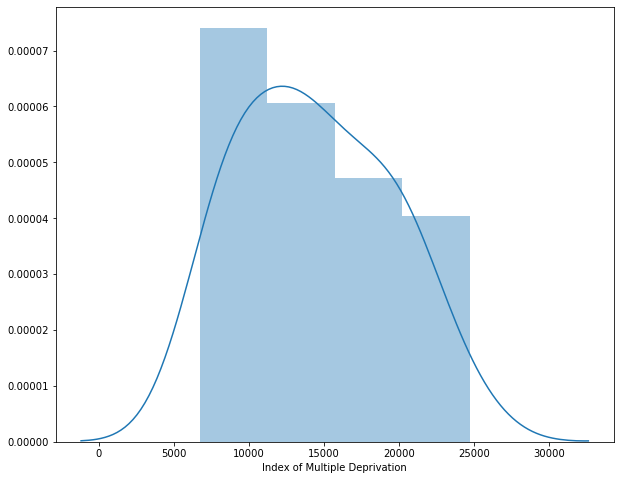

In [12]:
# plot boxplot with seaborn
plt.figure(figsize=(10,8))
sns.distplot(LondonDistrict_df['Index of Multiple Deprivation'])

In [13]:
# 25%       9826.488235
# 50%      13597.264217
# 75%      17657.859982
# max      24715.858600

def IMD_Category (row):
   if row['Index of Multiple Deprivation'] > 17658 :
      return 'High'
   elif (row['Index of Multiple Deprivation'] > 13597) :
      return 'MidHigh'
   elif (row['Index of Multiple Deprivation'] > 9826) :
      return 'MidLow'
   else:
      return 'Low'    


In [14]:
LondonDistrict_df['IMDCategory'] = LondonDistrict_df.apply(IMD_Category , axis=1)

In [15]:
LondonDistrict_df.head()

,District,Latitude,Longitude,Index of Multiple Deprivation,IMDCategory
0,Barking and Dagenham,51.546853,0.126620,6722.442784,Low
1,Barnet,51.608680,-0.206189,17657.859982,MidHigh
2,Bexley,51.460000,0.135774,19129.949361,High
3,Brent,51.555335,-0.259383,11132.975313,MidLow
4,Bromley,51.391456,0.030233,20506.499517,High


In [16]:
IMDHigh_district = LondonDistrict_df[LondonDistrict_df['IMDCategory'] == 'High']

In [17]:
IMDHighDistricts = IMDHigh_district['District'].tolist()
IMDHighDistricts

['Bexley',
 'Bromley',
 'City of London',
 'Harrow',
 'Kingston upon Thames',
 'Merton',
 'Richmond upon Thames',
 'Sutton']

In [18]:
IMDLowDistricts = LondonDistrict_df['District'][LondonDistrict_df['IMDCategory'] == 'Low'].tolist()
IMDLowDistricts

['Barking and Dagenham',
 'Hackney',
 'Islington',
 'Lambeth',
 'Newham',
 'Southwark',
 'Tower Hamlets',
 'Waltham Forest']

In [19]:
LondonDistrict_df.head()

,District,Latitude,Longitude,Index of Multiple Deprivation,IMDCategory
0,Barking and Dagenham,51.546853,0.126620,6722.442784,Low
1,Barnet,51.608680,-0.206189,17657.859982,MidHigh
2,Bexley,51.460000,0.135774,19129.949361,High
3,Brent,51.555335,-0.259383,11132.975313,MidLow
4,Bromley,51.391456,0.030233,20506.499517,High


In [20]:
LondonHomelesness_df = pd.read_csv("statutory-homelessness-Londonboroughs.csv")

In [21]:
LondonHomelesness_df.head()

,Current ONS Code,County and local authority area,Homeless
0,E09000007,Camden,94
1,E09000001,City of London,7
2,E09000012,Hackney,949
3,E09000013,Hammersmith and Fulham,249
4,E09000014,Haringey,395


In [22]:
LondonHomelesness_df.rename(columns = {'Current ONS Code':'District Code', 'County and local authority area':'District'}, inplace = True) 

In [23]:
GL_District_df = pd.merge(LondonDistrict_df, LondonHomelesness_df, how='inner', on='District')
GL_District_df = GL_District_df[['District','Latitude','Longitude', 'Index of Multiple Deprivation','IMDCategory','Homeless']]
GL_District_df.head()

,District,Latitude,Longitude,Index of Multiple Deprivation,IMDCategory,Homeless
0,Barking and Dagenham,51.546853,0.126620,6722.442784,Low,512
1,Barnet,51.608680,-0.206189,17657.859982,MidHigh,444
2,Bexley,51.460000,0.135774,19129.949361,High,500
3,Brent,51.555335,-0.259383,11132.975313,MidLow,536
4,Bromley,51.391456,0.030233,20506.499517,High,630


In [32]:
LondonCrime_df = pd.read_csv("MPS Borough Level Crime.csv")

In [33]:
LondonCrime_df.shape

(1577, 27)

In [34]:
LondonCrime_df.head()

,MajorText,MinorText,LookUp_BoroughName,201801,201802,201803,201804,201805,201806,201807,201808,201809,201810,201811,201812,201901,201902,201903,201904,201905,201906,201907,201908,201909,201910,201911,201912
0,Arson and Criminal Damage,Arson,Barking and Dagenham,2,3,6,3,4,12,6,5,3,8,5,1,5,2,5,5,11,3,5,3,6,9,8,5
1,Arson and Criminal Damage,Criminal Damage,Barking and Dagenham,135,111,115,122,126,123,127,101,107,131,105,88,97,127,138,130,138,113,134,118,109,109,100,114
2,Burglary,Burglary - Business and Community,Barking and Dagenham,38,33,38,36,24,33,30,18,33,32,39,33,45,24,29,27,22,27,31,35,37,30,30,24
3,Burglary,Burglary - Residential,Barking and Dagenham,143,134,122,75,93,77,94,84,99,94,106,164,114,108,99,96,114,96,71,67,80,97,114,131
4,Drug Offences,Drug Trafficking,Barking and Dagenham,4,5,7,3,8,6,9,7,9,6,7,3,5,2,6,4,8,6,7,6,6,9,10,2


In [36]:
LondonCrime_df.rename(columns = {'LookUp_BoroughName':'District', 'London Heathrow and London City Airports': 'City of London'}, inplace = True) 
LondonCrime_df.replace('London Heathrow and London City Airports', 'City of London', inplace = True) 

In [38]:
LondonCrime_df2 = LondonCrime_df.groupby(['District']).sum()
LondonCrime_df2.reset_index(inplace=True)

In [39]:
LondonCrime_df2['2018'] = LondonCrime_df2[LondonCrime_df2.columns[1:12]].sum(axis=1)
LondonCrime_df2['2019'] = LondonCrime_df2[LondonCrime_df2.columns[13:24]].sum(axis=1)
LondonCrime_df2.set_index('District', inplace=True)
LondonCrime_df2.head()

,201801,201802,201803,201804,201805,201806,201807,201808,201809,201810,201811,201812,201901,201902,201903,201904,201905,201906,201907,201908,201909,201910,201911,201912,2018,2019
District,,,,,,,,,,,,,,,,,,,,,,,,,,
Barking and Dagenham,1506,1425,1605,1453,1504,1568,1612,1459,1466,1582,1560,1544,1576,1574,1711,1680,1830,1699,1818,1549,1648,1796,1649,1628,16740,18530
Barnet,2259,2120,2396,2352,2396,2346,2366,2244,2264,2550,2562,2421,2412,2544,2840,2548,2557,2725,2826,2407,2600,2619,2821,2501,25855,28899
Bexley,1263,1097,1212,1193,1312,1334,1238,1243,1262,1341,1409,1465,1539,1348,1434,1491,1604,1467,1535,1522,1484,1669,1526,1349,13904,16619
Brent,2521,2360,2519,2397,2653,2697,2745,2510,2556,2727,2731,2384,2487,2367,2664,2443,2574,2561,2676,2472,2557,2655,2504,2232,28416,27960
Bromley,2008,1708,1956,1890,1979,2016,1927,1853,1941,1970,1989,1992,1997,1951,2105,1963,2107,2007,2194,2098,2110,2210,2269,1984,21237,23011


In [40]:
GL_District_df = pd.merge(GL_District_df, LondonCrime_df2[['2018','2019']], how='inner', on='District')
GL_District_df.rename(columns ={'2018':'Crime2018', '2019':'Crime2019'}, inplace=True)
GL_District_df.head()

,District,Latitude,Longitude,Index of Multiple Deprivation,IMDCategory,Homeless,Crime2018,Crime2019
0,Barking and Dagenham,51.546853,0.126620,6722.442784,Low,512,16740,18530
1,Barnet,51.608680,-0.206189,17657.859982,MidHigh,444,25855,28899
2,Bexley,51.460000,0.135774,19129.949361,High,500,13904,16619
3,Brent,51.555335,-0.259383,11132.975313,MidLow,536,28416,27960
4,Bromley,51.391456,0.030233,20506.499517,High,630,21237,23011


In [41]:
website_url = requests.get('https://en.wikipedia.org/wiki/List_of_sub-regions_used_in_the_London_Plan').text
soup = BeautifulSoup(website_url, 'html.parser')

In [42]:
My_table = soup.find('table',{'class':'wikitable sortable'})
table_rows = My_table.find_all('tr')
Row_list =[] 
for tr in table_rows:    
    td = tr.find_all('td')
    row=   [tr.text.rstrip() for tr in td]  
    Row_list.append(row) 
Row_list.pop(0)

[]

In [43]:
df_SubRegion = pd.DataFrame((Row_list), columns =['District','2004-2008','2008-2011','Sub-Region'])
df_SubRegion.drop(['2004-2008','2008-2011'], axis=1, inplace=True)
df_SubRegion.head()

,District,Sub-Region
0,City of London,Central
1,Barking and Dagenham,East
2,Barnet,North
3,Bexley,East
4,Brent,West


In [44]:
GL_District_df = pd.merge(df_SubRegion, GL_District_df, how='inner', on='District')
GL_District_df.head()

,District,Sub-Region,Latitude,Longitude,Index of Multiple Deprivation,IMDCategory,Homeless,Crime2018,Crime2019
0,City of London,Central,51.514622,-0.092233,20105.585622,High,7,3063,3255
1,Barking and Dagenham,East,51.546853,0.126620,6722.442784,Low,512,16740,18530
2,Barnet,North,51.608680,-0.206189,17657.859982,MidHigh,444,25855,28899
3,Bexley,East,51.460000,0.135774,19129.949361,High,500,13904,16619
4,Brent,West,51.555335,-0.259383,11132.975313,MidLow,536,28416,27960


## <font color=red>__Exploratory Data Analysis__</font>

### __Word cloud Analysis__ - London districts - Index of Multiple Deprivation, Homeless & Crime

In [45]:
IMD_dict  =  dict(zip(GL_District_df['District'], GL_District_df['Index of Multiple Deprivation']))

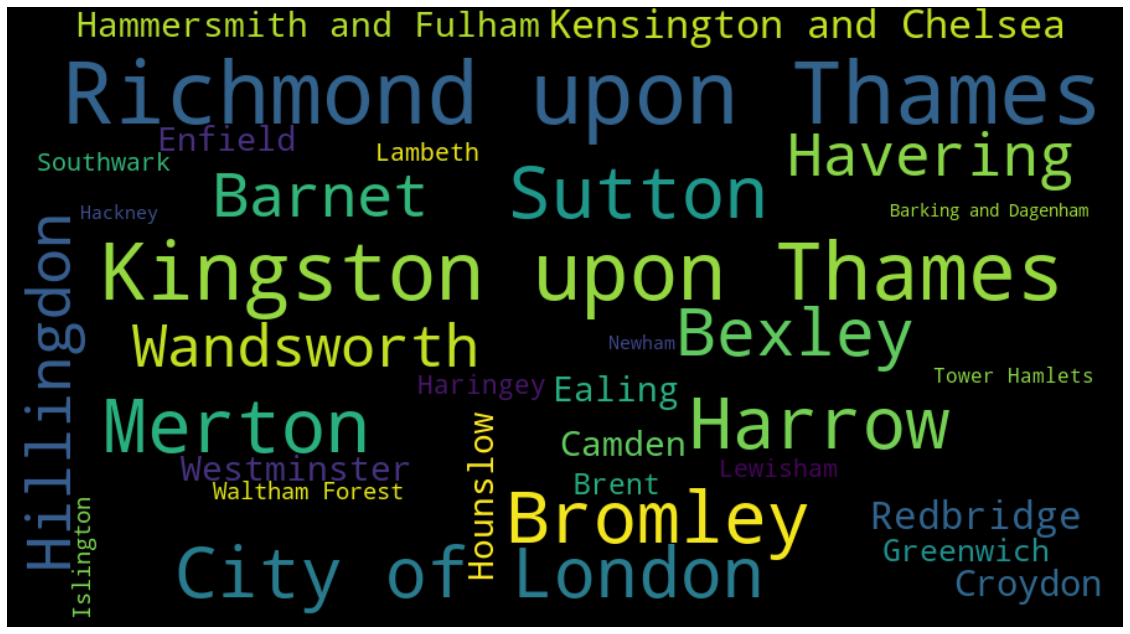

In [46]:
#Generating wordcloud. Relative scaling value is to adjust the importance of a frequency word.
#See documentation: https://github.com/amueller/word_cloud/blob/master/wordcloud/wordcloud.py
wordcloud = WordCloud(width=900,height=500, max_words=1628,relative_scaling=1,normalize_plurals=False).generate_from_frequencies(IMD_dict )
fig = plt.figure()
fig.set_figwidth(20) # set width
fig.set_figheight(24) # set height
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [47]:
Homeless_dict =  dict(zip(GL_District_df['District'], GL_District_df['Homeless']))

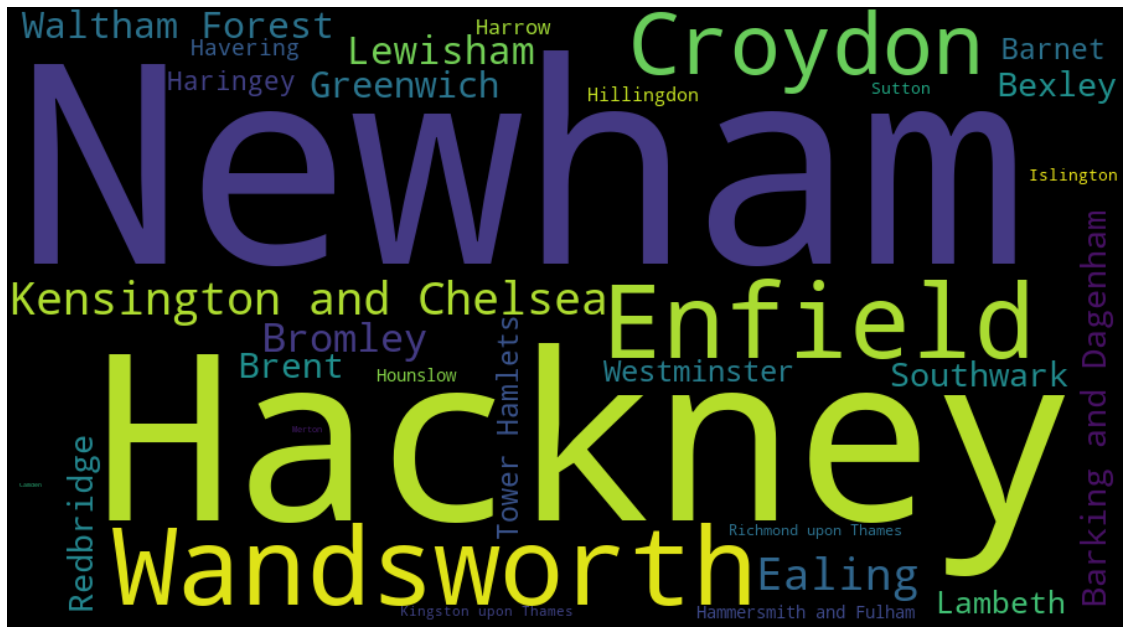

In [48]:
#Generating wordcloud. Relative scaling value is to adjust the importance of a frequency word.
#See documentation: https://github.com/amueller/word_cloud/blob/master/wordcloud/wordcloud.py
wordcloud = WordCloud(width=900,height=500, max_words=1628,relative_scaling=1,normalize_plurals=False).generate_from_frequencies(Homeless_dict)
fig = plt.figure()
fig.set_figwidth(20) # set width
fig.set_figheight(24) # set height
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [49]:
Crime_dict =  dict(zip(GL_District_df['District'], GL_District_df['Crime2019']))

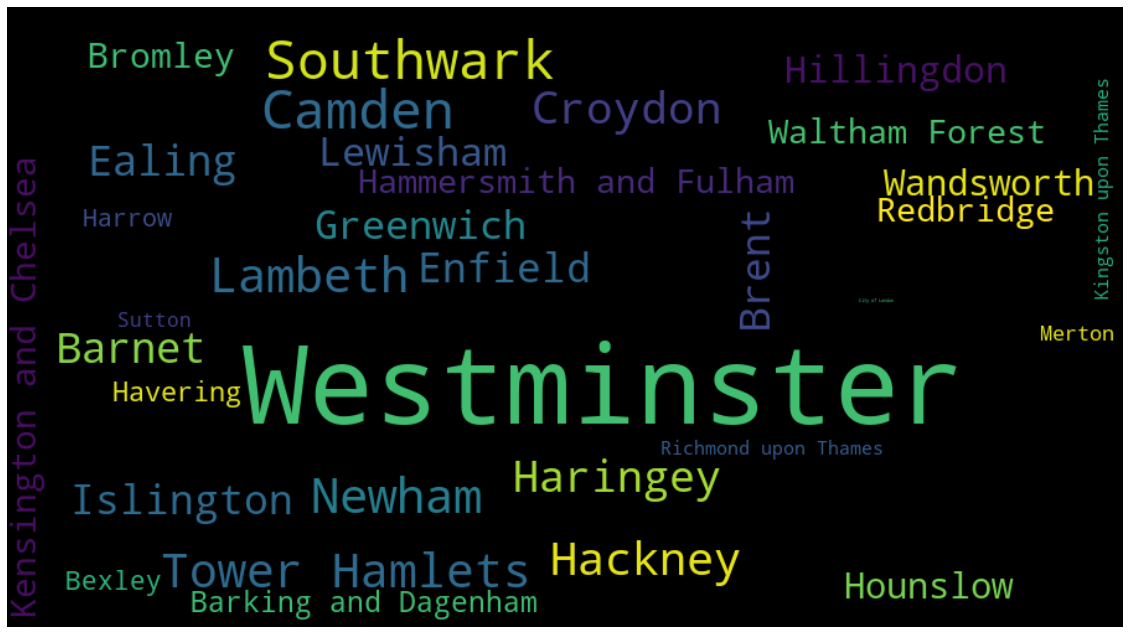

In [50]:
#Generating wordcloud. Relative scaling value is to adjust the importance of a frequency word.
#See documentation: https://github.com/amueller/word_cloud/blob/master/wordcloud/wordcloud.py
wordcloud = WordCloud(width=900,height=500, max_words=1628,relative_scaling=1,normalize_plurals=False).generate_from_frequencies(Crime_dict)
fig = plt.figure()
fig.set_figwidth(20) # set width
fig.set_figheight(24) # set height

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


#### __Bar chart Analysis__ - London districts - Index of Multiple Deprivation, Homeless & Crime

In [51]:
GL_District_reg = GL_District_df[['District','Sub-Region','Index of Multiple Deprivation','IMDCategory','Homeless','Crime2019']]

In [52]:
GL_District_reg.rename(columns = {'Crime2019':'Crime'}, inplace = True) 

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/frame.py:4238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


In [53]:
GL_District_reg.describe()

,Index of Multiple Deprivation,Homeless,Crime
count,33.000000,33.000000,33.000000
mean,14362.550517,468.787879,25587.545455
std,4995.885040,256.657086,11927.290396
min,6722.442784,7.000000,3255.000000
25%,9826.488235,249.000000,18530.000000
50%,13597.264217,467.000000,25094.000000
75%,17657.859982,614.000000,29873.000000
max,24715.858600,1143.000000,75501.000000


In [54]:
GL_District_reg.set_index('District', inplace=True)

In [55]:
GL_District_reg.head()

,Sub-Region,Index of Multiple Deprivation,IMDCategory,Homeless,Crime
District,,,,,
City of London,Central,20105.585622,High,7,3255
Barking and Dagenham,East,6722.442784,Low,512,18530
Barnet,North,17657.859982,MidHigh,444,28899
Bexley,East,19129.949361,High,500,16619
Brent,West,11132.975313,MidLow,536,27960


In [56]:
# Assuming same lines from your example
cols_to_norm = ['Index of Multiple Deprivation','Homeless','Crime']
GL_District_reg[cols_to_norm] = GL_District_reg[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/frame.py:3509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [57]:
GL_District_reg.head()

,Sub-Region,Index of Multiple Deprivation,IMDCategory,Homeless,Crime
District,,,,,
City of London,Central,0.743780,High,0.000000,0.000000
Barking and Dagenham,East,0.000000,Low,0.444542,0.211430
Barnet,North,0.607745,MidHigh,0.384683,0.354954
Bexley,East,0.689558,High,0.433979,0.184979
Brent,West,0.245119,MidLow,0.465669,0.341957


In [58]:
GL_District_reg.describe()

,Index of Multiple Deprivation,Homeless,Crime
count,33.000000,33.000000,33.000000
mean,0.424606,0.406503,0.309118
std,0.277651,0.225931,0.165093
min,0.000000,0.000000,0.000000
25%,0.172510,0.213028,0.211430
50%,0.382074,0.404930,0.302287
75%,0.607745,0.534331,0.368436
max,1.000000,1.000000,1.000000


In [59]:
GL_District_reg[GL_District_reg['Sub-Region']=='Central'].describe()

,Index of Multiple Deprivation,Homeless,Crime
count,7.000000,7.000000,7.000000
mean,0.351351,0.303571,0.422135
std,0.225225,0.220936,0.301143
min,0.129884,0.000000,0.000000
25%,0.162613,0.133363,0.307097
50%,0.356709,0.393486,0.415940
75%,0.451928,0.423415,0.462406
max,0.743780,0.617958,1.000000


In [60]:
GL_District_Reg = GL_District_reg.groupby(['Sub-Region']).mean()

In [61]:
GL_District_Reg.reset_index()

,Sub-Region,Index of Multiple Deprivation,Homeless,Crime
0,Central,0.351351,0.303571,0.422135
1,East,0.247171,0.533451,0.298502
2,North,0.379949,0.470657,0.355115
3,South,0.703214,0.396420,0.223922
4,West,0.531670,0.309230,0.264578


In [62]:
# use the inline backend to generate the plots within the browser
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.1.1


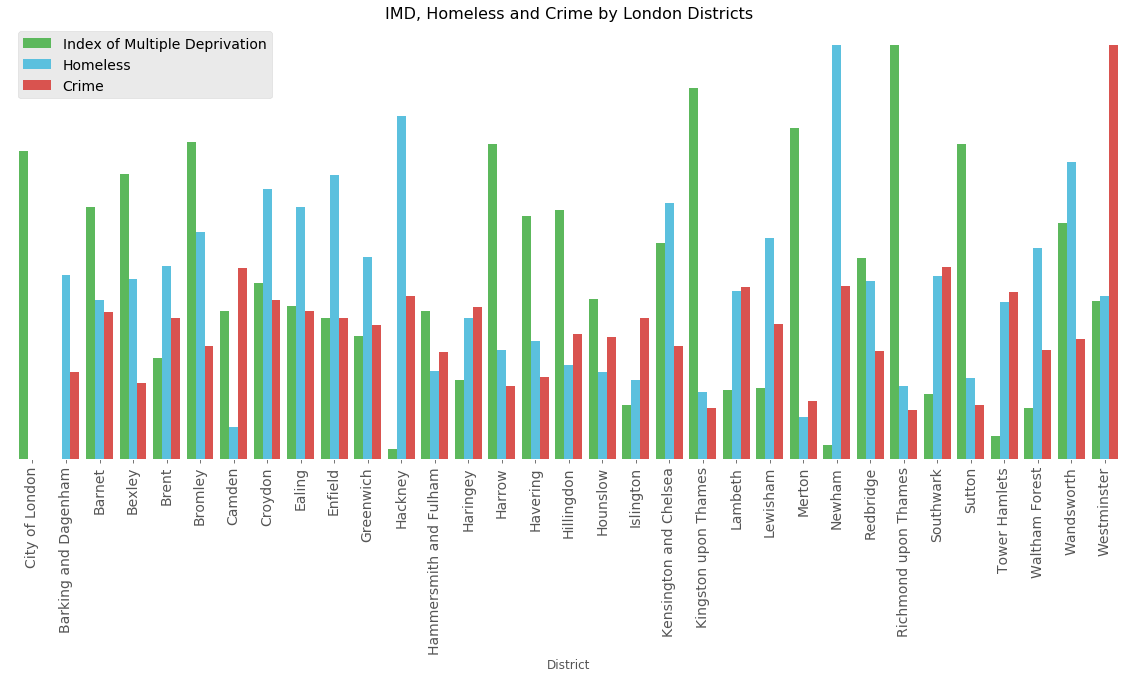

In [63]:
# bar chart . use a figure size of (20, 8),bar width of 0.8,
# use color #5cb85c for the Very interested bars, color #5bc0de for the Somewhat interested bars, and color #d9534f for the Not interested bars,
# use font size 14 for the bar labels, percentages, and legend,
# use font size 16 for the title, and,
# display the percentages above the bars as shown above, and remove the left, top, and right borders.

#df_percentage.plot(kind='bar', figsize=(20, 8))
ax = GL_District_reg.plot(kind='bar', width=0.8, figsize=(20, 8), color=['#5cb85c', '#5bc0de', '#d9534f'], fontsize=14)

ax.set_facecolor('white')

ax.get_yaxis().set_visible(False)


    
plt.xlabel('District') # add to x-label to the plot
plt.title('IMD, Homeless and Crime by London Districts', fontsize=16) # add title to the plot
plt.legend( fontsize=14) 
# for p in ax.patches:
#     ax.annotate(str(p.get_height() ) , (p.get_x(), p.get_height() + 0.8), fontsize=14)
  
# for tick in ax.get_xticklines():
#     tick.set_color('red')

    

plt.show()

#### __Regression plot__ - London districts - Index of Multiple Deprivation, Homeless & Crime¶

In [64]:
df_tot = GL_District_reg[['Index of Multiple Deprivation','Homeless','Crime']]

# view the final dataframe
df_tot.head()

,Index of Multiple Deprivation,Homeless,Crime
District,,,
City of London,0.743780,0.000000,0.000000
Barking and Dagenham,0.000000,0.444542,0.211430
Barnet,0.607745,0.384683,0.354954
Bexley,0.689558,0.433979,0.184979
Brent,0.245119,0.465669,0.341957


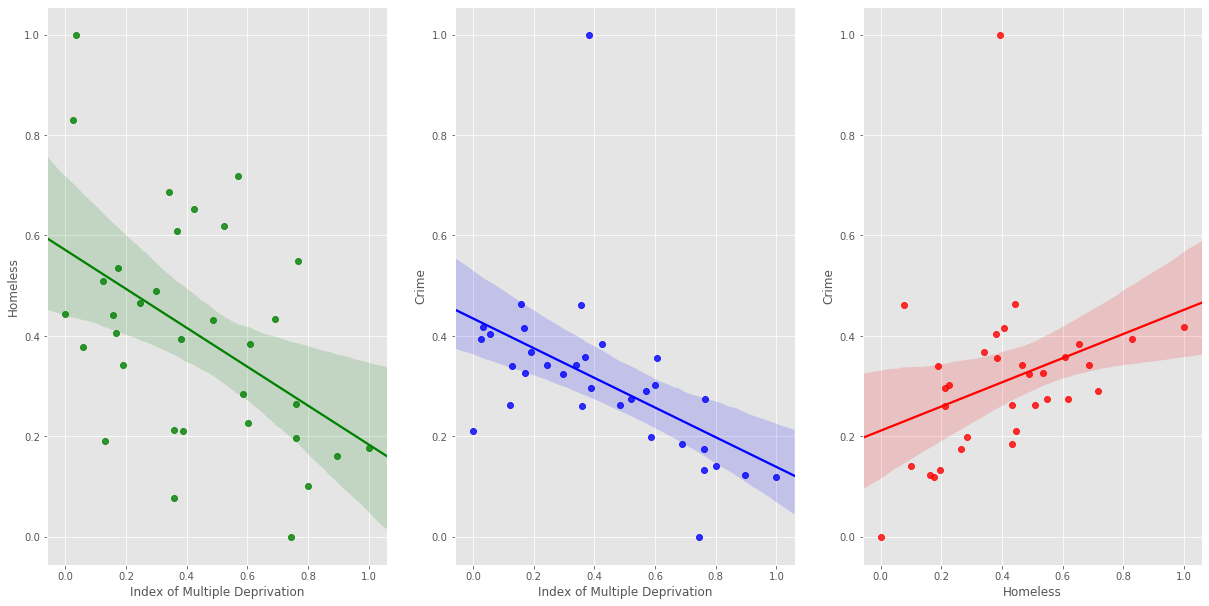

In [65]:
a4_dims = (20.7, 10.27)
fig, axs = plt.subplots(ncols=3, figsize=a4_dims)

sns.regplot(x='Index of Multiple Deprivation', y='Homeless', data=df_tot, ax=axs[0], color='green')
sns.regplot(x='Index of Multiple Deprivation', y='Crime', data=df_tot, ax=axs[1], color='blue')
sns.regplot(x='Homeless',y='Crime', data=df_tot, ax=axs[2], color='red')

#### __Bar Chart__  - London Sub-region - Index of Multiple Deprivation, Homeless & Crime

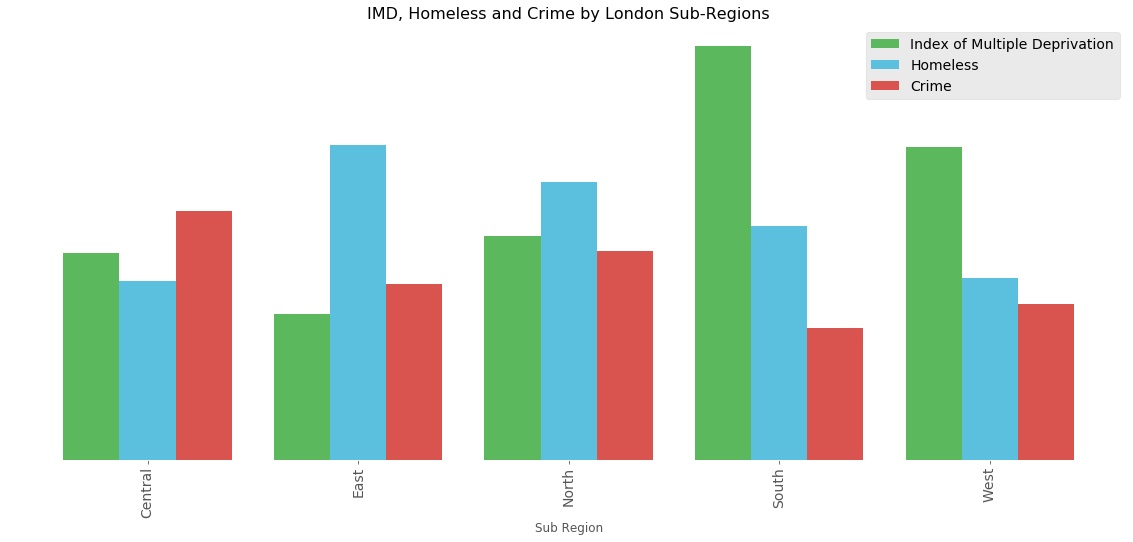

In [66]:
# bar chart . use a figure size of (20, 8),bar width of 0.8,
# use color #5cb85c for the Very interested bars, color #5bc0de for the Somewhat interested bars, and color #d9534f for the Not interested bars,
# use font size 14 for the bar labels, percentages, and legend,
# use font size 16 for the title, and,
# display the percentages above the bars as shown above, and remove the left, top, and right borders.

#df_percentage.plot(kind='bar', figsize=(20, 8))
ax = GL_District_Reg[['Index of Multiple Deprivation','Homeless','Crime']].plot(kind='bar', width=0.8, figsize=(20, 8), color=['#5cb85c', '#5bc0de', '#d9534f'], fontsize=14)

ax.set_facecolor('white')

ax.get_yaxis().set_visible(False)


    
plt.xlabel('Sub Region') # add to x-label to the plot
plt.title('IMD, Homeless and Crime by London Sub-Regions', fontsize=16) # add title to the plot
plt.legend( fontsize=14) 
# for p in ax.patches:
#     ax.annotate(str(p.get_height() ) , (p.get_x(), p.get_height() + 0.8), fontsize=14)
  
# for tick in ax.get_xticklines():
#     tick.set_color('red')

    

plt.show()

#### __Box plots__ - London Sub regions - Index of Multiple Deprivation, Homeless & Crime

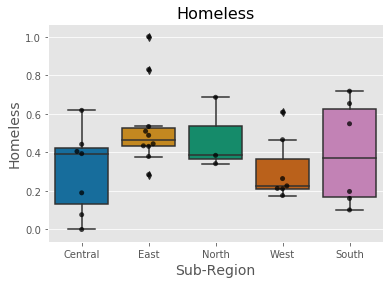

In [67]:
# plot boxplot with seaborn
bplot=sns.boxplot(y='Homeless', x='Sub-Region', 
                 data=GL_District_reg, 
                 palette="colorblind")
 
# add swarmplot
bplot=sns.swarmplot(y='Homeless', x='Sub-Region', 
                 data=GL_District_reg, 
               
              color='black',
              alpha=0.75)

bplot.axes.set_title("Homeless",
                    fontsize=16)
 
bplot.set_xlabel("Sub-Region", 
                fontsize=14)
 
bplot.set_ylabel("Homeless",
                fontsize=14)
 
bplot.tick_params(labelsize=10)

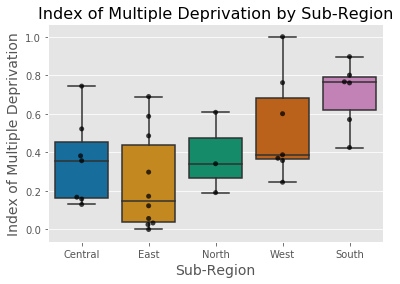

In [68]:
# plot boxplot with seaborn
bplot=sns.boxplot(y='Index of Multiple Deprivation', x='Sub-Region', 
                 data=GL_District_reg, 
                 palette="colorblind")
 
# add swarmplot
bplot=sns.swarmplot(y='Index of Multiple Deprivation', x='Sub-Region', 
                 data=GL_District_reg, 
               
              color='black',
              alpha=0.75)

bplot.axes.set_title("Index of Multiple Deprivation by Sub-Region",
                    fontsize=16)
 
bplot.set_xlabel("Sub-Region", 
                fontsize=14)
 
bplot.set_ylabel("Index of Multiple Deprivation",
                fontsize=14)
 
bplot.tick_params(labelsize=10)

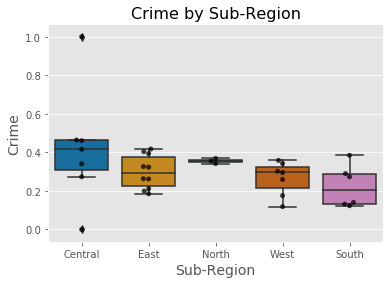

In [69]:
# plot boxplot with seaborn
bplot=sns.boxplot(y='Crime', x='Sub-Region', 
                 data=GL_District_reg, 
                 palette="colorblind")
 
# add swarmplot
bplot=sns.swarmplot(y='Crime', x='Sub-Region', 
                 data=GL_District_reg, 
               
              color='black',
              alpha=0.75)

bplot.axes.set_title("Crime by Sub-Region",
                    fontsize=16)
 
bplot.set_xlabel("Sub-Region", 
                fontsize=14)
 
bplot.set_ylabel("Crime",
                fontsize=14)
 
bplot.tick_params(labelsize=10)

#### __Getting the data ready for Clustering__

#### We are going to only focus on the most deprived areas with Low IMD (Index of Multiple Deprivation)

##### Select the Post code data for Low IMD districts

In [70]:
LondonPostal_IMDLow_df = LondonPostal_df[LondonPostal_df['District'].isin(IMDLowDistricts)].reset_index(drop=True)

In [71]:
LondonPostal_IMDLow_df.head()

,Postcode,Latitude,Longitude,District,Constituency,Ward,Index of Multiple Deprivation
0,CR4 1TL,51.412805,-0.146432,Lambeth,Streatham,Streatham South,7256
1,CR4 1TN,51.412854,-0.147796,Lambeth,Streatham,Streatham South,7256
2,E1 0AA,51.512497,-0.052098,Tower Hamlets,Poplar and Limehouse,Shadwell,2403
3,E1 0AD,51.512910,-0.055323,Tower Hamlets,Poplar and Limehouse,Shadwell,2403
4,E1 0AE,51.510671,-0.052594,Tower Hamlets,Poplar and Limehouse,Shadwell,7672


#### Group data by Ward to get the Ward data which will be used for Clustering

In [72]:
LondonWard_IMDLow_df = LondonPostal_IMDLow_df.groupby(['Ward']).mean()
LondonWard_IMDLow_df.reset_index(inplace=True)
LondonWard_IMDLow_df.head()

,Ward,Latitude,Longitude,Index of Multiple Deprivation
0,Abbey,51.539509,0.078658,6719.834101
1,Alibon,51.545772,0.149366,5045.475524
2,Barnsbury,51.537210,-0.111114,9783.516556
3,Beckton,51.513422,0.060282,8324.954198
4,Becontree,51.554173,0.118678,5992.940217


In [73]:
LondonWard_df = LondonPostal_df[['Ward','Constituency', 'District']]

In [74]:
LondonWard_df.shape

(178344, 3)

In [75]:
LondonWard_df.drop_duplicates(inplace=True)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [76]:
LondonWard_df.shape

(689, 3)

In [77]:
LondonWard_df.head()

,Ward,Constituency,District
0,Bromley Town,Bromley and Chislehurst,Bromley
110,Bickley,Bromley and Chislehurst,Bromley
413,Plaistow and Sundridge,Bromley and Chislehurst,Bromley
711,Downham,Lewisham East,Lewisham
985,Whitefoot,Lewisham East,Lewisham


In [78]:
London_Ward_df = pd.merge(LondonWard_df, GL_District_df[['District','Sub-Region', 'Homeless', 'Crime2019']], how='left', on='District')
London_Ward_df.head()

,Ward,Constituency,District,Sub-Region,Homeless,Crime2019
0,Bromley Town,Bromley and Chislehurst,Bromley,South,630,23011
1,Bickley,Bromley and Chislehurst,Bromley,South,630,23011
2,Plaistow and Sundridge,Bromley and Chislehurst,Bromley,South,630,23011
3,Downham,Lewisham East,Lewisham,East,614,26853
4,Whitefoot,Lewisham East,Lewisham,East,614,26853


In [79]:
London_Ward_df.shape

(689, 6)

In [80]:
# LondonWard_IMDLow_data = LondonWard_IMDLow[['Index of Multiple Deprivation']].copy()

LondonWard_IMDLow_df[['Index of Multiple Deprivation']].shape

(155, 1)

### __KMeans__

In [81]:
    
Sum_of_squared_distances = []
K = range(1,50)
for k in K:
    km = KMeans(n_clusters=k, random_state=0).fit(LondonWard_IMDLow_df[['Index of Multiple Deprivation']])
    Sum_of_squared_distances.append(km.inertia_)

#### Elbow Method for Optimal k

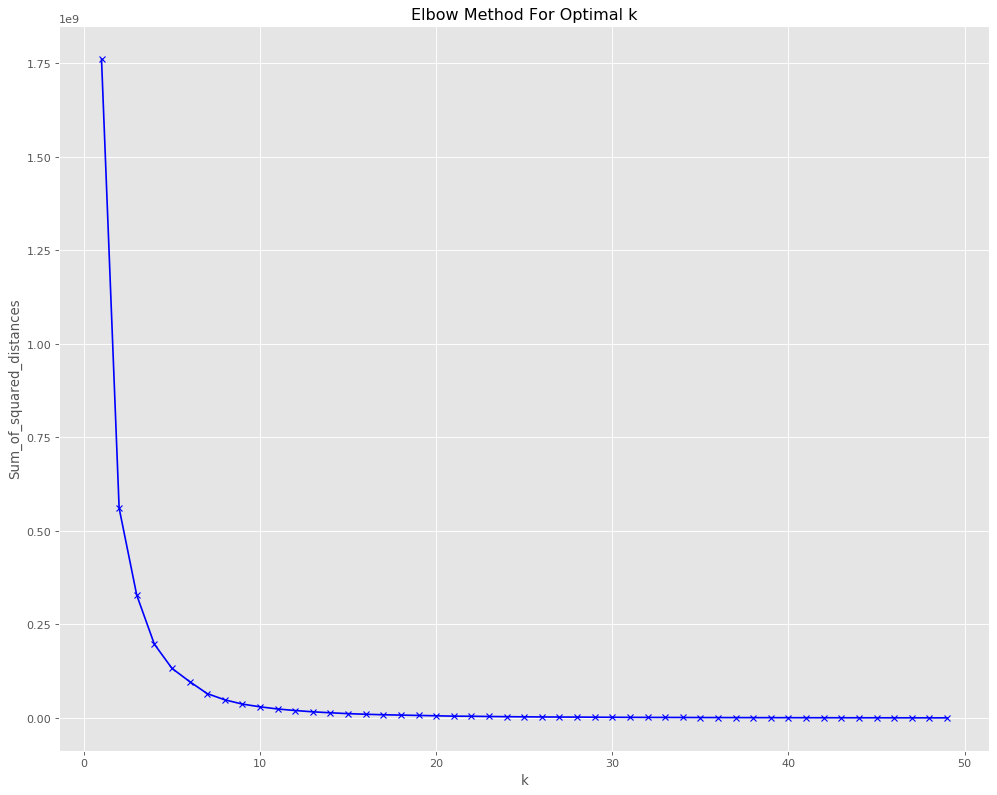

In [82]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(15,12), dpi=80, facecolor='w', edgecolor='k')

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

#### Optimal K = 5

### <font color=red>__Foursqure Venue Analysis__</font>

In [197]:
CLIENT_ID = 'B4YCQWZMNDPYZCFDNSIOV3RQSKV4Q5ZUHOGGDCZNN3NGKS0I' # your Foursquare ID
CLIENT_SECRET = '0MK2ON1VBIR4M5AYMYGH0TV0OAQ1OMYQNLKGG1RZ1A1VYKEA' # your Foursquare Secret
VERSION = '20180604'


In [198]:
address = 'London, GB'
geolocator=Nominatim(timeout=3)
geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of London are {}, {}.'.format(latitude, longitude))

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Using Nominatim with the default "geopy/1.21.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  


The geograpical coordinate of London are 51.5073219, -0.1276474.


In [199]:
neighborhood_latitude = latitude
neighborhood_longitude = longitude

LIMIT = 500 # limit of number of venues returned by Foursquare API

radius = 1000 # define radius

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)


In [200]:
results = requests.get(url).json()

In [201]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [202]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]


nearby_venues.head(5)

,name,categories,lat,lng
0,National Gallery,Art Museum,51.508876,-0.128478
1,Trafalgar Square,Plaza,51.507987,-0.128048
2,East Trafalgar Square Fountain,Fountain,51.508088,-0.127700
3,Corinthia Hotel,Hotel,51.506607,-0.124460
4,Sainsbury Wing National Gallery,Art Museum,51.508384,-0.129001


In [203]:
nearby_venues.shape

(100, 4)

In [204]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
                      
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [176]:
LondonWard_IMDLow_df.shape

(155, 4)

In [205]:
geolocator=Nominatim(timeout=5)
London_venues = getNearbyVenues(names=LondonWard_IMDLow_df['Ward'],
                                   latitudes=LondonWard_IMDLow_df['Latitude'],
                                   longitudes=LondonWard_IMDLow_df['Longitude']
                                  )


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Using Nominatim with the default "geopy/1.21.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  """Entry point for launching an IPython kernel.


Abbey
Alibon
Barnsbury
Beckton
Becontree
Bethnal Green
Bishop's
Blackwall & Cubitt Town
Boleyn
Borough & Bankside
Bow East
Bow West
Brixton Hill
Bromley North
Bromley South
Brownswood
Bunhill
Caledonian
Camberwell Green
Canary Wharf
Cann Hall
Canning Town North
Canning Town South
Canonbury
Cathall
Cazenove
Chadwell Heath
Champion Hill
Chapel End
Chaucer
Chingford Green
Clapham Common
Clapham Town
Clerkenwell
Clissold
Coldharbour
Custom House
Dalston
De Beauvoir
Dulwich Hill
Dulwich Village
Dulwich Wood
East Ham Central
East Ham North
East Ham South
Eastbrook
Eastbury
Endlebury
Faraday
Ferndale
Finsbury Park
Forest
Forest Gate North
Forest Gate South
Gascoigne
Gipsy Hill
Goose Green
Goresbrook
Green Street East
Green Street West
Grove Green
Hackney Central
Hackney Downs
Hackney Wick
Haggerston
Hale End and Highams Park
Hatch Lane
Heath
Herne Hill
High Street
Higham Hill
Highbury East
Highbury West
Hillrise
Hoe Street
Holloway
Homerton
Hoxton East & Shoreditch
Hoxton West
Island Gardens


In [207]:
print(London_venues.shape)

(3775, 7)


In [209]:
# unique categories can be curated from all the returned venues
print('There are {} uniques categories.'.format(len(London_venues['Venue Category'].unique())))

There are 315 uniques categories.


##### We are focussing on Sports devlopement in the deprived districts. Therefore we need get the relevant venues so we can identify which wards require sports facilities.  
##### Therefore, we have create a list from Four Square Categories which contains 95% of sports and arts
##### We also need to some general venues to avoid null data returned for wards as we cannot afford to delete the ward with null data as they are most likely to require development

In [210]:
SportsAndArtsFacility = ['Park', 'Pool', 'Gym','Gym / Fitness Center', 'Gym Pool','Cricket Ground','Athletics & Sports','Gym Pool','Climbing Gym','Yoga Studio','Event Space','Film Studio',
    'Cycle Studio', 'Playground', 'Boxing Gym','Tennis Court','Volleyball Court','Performing Arts Venue','Recreation Center','Go Kart Track',
    'Outdoors & Recreation','Sports Club','Art Gallery', 'Soccer Field', 'Sports Club', 'Squash Court', 'Sporting Goods Shop','Doctor\'s Office',
    'Hockey Field', 'Hockey Rink', 'Paintball Field', 'Rugby Pitch', 'Skate Park', 'Skating Rink', 'Pool Hall','Theme Park','Water Park','Theme Park Ride / Attraction',
    'College & University','Music Venue', 'Garden Center', 'Golf Course', 'Mini Golf', 'Café', 'Campground', 'Supermarket', 'Nature Preserve','Metro Station', 
    'School', 'Train Station', 'Shopping Mall', 'Convenience Store','Grocery Store', 'Home Service','Martial Arts Dojo','Bus Stop','Bookstore','Pharmacy','IT Services']

In [211]:
SportsAndArtsFacility = sorted(SportsAndArtsFacility)

In [212]:
print(SportsAndArtsFacility)

['Art Gallery', 'Athletics & Sports', 'Bookstore', 'Boxing Gym', 'Bus Stop', 'Café', 'Campground', 'Climbing Gym', 'College & University', 'Convenience Store', 'Cricket Ground', 'Cycle Studio', "Doctor's Office", 'Event Space', 'Film Studio', 'Garden Center', 'Go Kart Track', 'Golf Course', 'Grocery Store', 'Gym', 'Gym / Fitness Center', 'Gym Pool', 'Gym Pool', 'Hockey Field', 'Hockey Rink', 'Home Service', 'IT Services', 'Martial Arts Dojo', 'Metro Station', 'Mini Golf', 'Music Venue', 'Nature Preserve', 'Outdoors & Recreation', 'Paintball Field', 'Park', 'Performing Arts Venue', 'Pharmacy', 'Playground', 'Pool', 'Pool Hall', 'Recreation Center', 'Rugby Pitch', 'School', 'Shopping Mall', 'Skate Park', 'Skating Rink', 'Soccer Field', 'Sporting Goods Shop', 'Sports Club', 'Sports Club', 'Squash Court', 'Supermarket', 'Tennis Court', 'Theme Park', 'Theme Park Ride / Attraction', 'Train Station', 'Volleyball Court', 'Water Park', 'Yoga Studio']


In [213]:
London_Venues_df = London_venues[London_venues['Venue Category'].isin(SportsAndArtsFacility)].reset_index(drop= True)
London_Venues_df.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Abbey,51.539509,0.078658,Barking Abbey,51.535352,0.076054,Park
1,Abbey,51.539509,0.078658,The Gym London Barking,51.536193,0.078601,Gym
2,Abbey,51.539509,0.078658,Asda,51.537384,0.077050,Supermarket
3,Abbey,51.539509,0.078658,Boots,51.538888,0.080724,Pharmacy
4,Abbey,51.539509,0.078658,Tesco Express,51.536931,0.080411,Grocery Store


In [214]:
London_Venues_df.shape

(1005, 7)

In [215]:
# one hot encoding
London_onehot = pd.get_dummies(London_Venues_df[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
London_onehot['Neighborhood'] = London_Venues_df['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [London_onehot.columns[-1]] + list(London_onehot.columns[:-1])
London_onehot = London_onehot[fixed_columns]

London_onehot.head()


,Neighborhood,Art Gallery,Athletics & Sports,Bookstore,Boxing Gym,Bus Stop,Café,Campground,Climbing Gym,Convenience Store,Cricket Ground,Cycle Studio,Event Space,Film Studio,Garden Center,Go Kart Track,Golf Course,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Home Service,IT Services,Martial Arts Dojo,Metro Station,Mini Golf,Music Venue,Nature Preserve,Outdoors & Recreation,Park,Performing Arts Venue,Pharmacy,Playground,Pool,Pool Hall,Recreation Center,Rugby Pitch,School,Shopping Mall,Skate Park,Soccer Field,Sporting Goods Shop,Supermarket,Tennis Court,Theme Park Ride / Attraction,Train Station,Yoga Studio
0,Abbey,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Abbey,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Abbey,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,Abbey,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Abbey,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [216]:
London_onehot.shape

(1005, 47)

In [217]:
London_grouped = London_onehot.groupby('Neighborhood').mean().reset_index()

In [218]:
London_grouped.head(10)

,Neighborhood,Art Gallery,Athletics & Sports,Bookstore,Boxing Gym,Bus Stop,Café,Campground,Climbing Gym,Convenience Store,Cricket Ground,Cycle Studio,Event Space,Film Studio,Garden Center,Go Kart Track,Golf Course,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Home Service,IT Services,Martial Arts Dojo,Metro Station,Mini Golf,Music Venue,Nature Preserve,Outdoors & Recreation,Park,Performing Arts Venue,Pharmacy,Playground,Pool,Pool Hall,Recreation Center,Rugby Pitch,School,Shopping Mall,Skate Park,Soccer Field,Sporting Goods Shop,Supermarket,Tennis Court,Theme Park Ride / Attraction,Train Station,Yoga Studio
0,Abbey,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.250000,0.125000,0.000000,0.000000,0.0,0.000000,0.0,0.125000,0.0,0.000000,0.0,0.0,0.125000,0.000000,0.125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.250000,0.000000,0.0,0.0,0.0
1,Alibon,0.000000,0.000000,0.000000,0.0,0.166667,0.000000,0.0,0.0,0.166667,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.166667,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.166667,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.166667,0.166667,0.000000,0.0,0.0,0.0
2,Barnsbury,0.000000,0.000000,0.000000,0.0,0.000000,0.300000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.300000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.100000,0.0,0.0,0.100000,0.000000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.200000,0.000000,0.0,0.0,0.0
3,Beckton,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.333333,0.000000,0.166667,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.166667,0.000000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.333333,0.000000,0.0,0.0,0.0
4,Becontree,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.500000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.500000,0.000000,0.0,0.0,0.0
5,Bethnal Green,0.076923,0.000000,0.000000,0.0,0.000000,0.307692,0.0,0.0,0.153846,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.153846,0.076923,0.076923,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.153846,0.000000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
6,Bishop's,0.000000,0.000000,0.142857,0.0,0.000000,0.285714,0.0,0.0,0.000000,0.0,0.0,0.142857,0.0,0.0,0.0,0.0,0.142857,0.000000,0.142857,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.142857,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
7,Blackwall & Cubitt Town,0.000000,0.166667,0.000000,0.0,0.500000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.166667,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.166667,0.0,0.0,0.0
8,Boleyn,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.500000,0.000000,0.500000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
9,Borough & Bankside,0.052632,0.000000,0.052632,0.0,0.000000,0.210526,0.0,0.0,0.000000,0.0,0.0,0.052632,0.0,0.0,0.0,0.0,0.052632,0.000000,0.263158,0.000000,0.0,0.052632,0.0,0.000000,0.0,0.052632,0.0,0.0,0.052632,0.157895,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0


In [219]:
London_grouped.shape

(155, 47)

In [220]:
# num_top_venues = 1

# for hood in London_grouped['Neighborhood']:
#     print("----"+hood+"----")
#     temp = London_grouped[London_grouped['Neighborhood'] == hood].T.reset_index()
#     temp.columns = ['venue','freq']
#     temp = temp.iloc[1:]
#     temp['freq'] = temp['freq'].astype(float)
#     temp = temp.round({'freq': 2})
#     print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
#     print('\n')

In [221]:
# set number of clusters
kclusters = 5

London_grouped_clustering = London_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(London_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 3, 2, 0, 0, 2, 2, 3, 0, 2], dtype=int32)

In [227]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [228]:
num_top_venues = 20

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
London_Venues_sorted = pd.DataFrame(columns=columns)
London_Venues_sorted['Neighborhood'] = London_grouped['Neighborhood']

for ind in np.arange(London_grouped.shape[0]):
    London_Venues_sorted.iloc[ind, 1:] = return_most_common_venues(London_grouped.iloc[ind, :], num_top_venues)

London_Venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue
0,Abbey,Supermarket,Grocery Store,Metro Station,Gym,Park,Pharmacy,Yoga Studio,Event Space,Gym / Fitness Center,Golf Course,Go Kart Track,Garden Center,Film Studio,Cycle Studio,Home Service,Cricket Ground,Convenience Store,Climbing Gym,Campground,Café
1,Alibon,Metro Station,Supermarket,Sporting Goods Shop,Bus Stop,Grocery Store,Convenience Store,Yoga Studio,Event Space,Gym / Fitness Center,Gym,Golf Course,Go Kart Track,Garden Center,Film Studio,Cricket Ground,Cycle Studio,Home Service,Climbing Gym,Campground,Café
2,Barnsbury,Grocery Store,Café,Supermarket,Music Venue,Park,Yoga Studio,Event Space,Gym / Fitness Center,Gym,Golf Course,Go Kart Track,Garden Center,Film Studio,Cycle Studio,Home Service,Cricket Ground,Convenience Store,Climbing Gym,Campground,Bus Stop
3,Beckton,Supermarket,Grocery Store,Gym / Fitness Center,Park,Yoga Studio,Event Space,Gym Pool,Gym,Golf Course,Go Kart Track,Garden Center,Film Studio,Cycle Studio,IT Services,Cricket Ground,Convenience Store,Climbing Gym,Campground,Café,Bus Stop
4,Becontree,Supermarket,Gym,Yoga Studio,Cycle Studio,Gym Pool,Gym / Fitness Center,Grocery Store,Golf Course,Go Kart Track,Garden Center,Film Studio,Event Space,Cricket Ground,IT Services,Convenience Store,Climbing Gym,Campground,Café,Bus Stop,Boxing Gym


In [229]:
# add clustering labels
London_Venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

London_merged = LondonWard_IMDLow_df

# merge london_grouped with london_data to add latitude/longitude for each neighborhood
London_merged = London_merged.join(London_Venues_sorted.set_index('Neighborhood'), on='Ward')

London_merged.head() # check the last columns!

,Ward,Latitude,Longitude,Index of Multiple Deprivation,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue
0,Abbey,51.539509,0.078658,6719.834101,0,Supermarket,Grocery Store,Metro Station,Gym,Park,Pharmacy,Yoga Studio,Event Space,Gym / Fitness Center,Golf Course,Go Kart Track,Garden Center,Film Studio,Cycle Studio,Home Service,Cricket Ground,Convenience Store,Climbing Gym,Campground,Café
1,Alibon,51.545772,0.149366,5045.475524,3,Metro Station,Supermarket,Sporting Goods Shop,Bus Stop,Grocery Store,Convenience Store,Yoga Studio,Event Space,Gym / Fitness Center,Gym,Golf Course,Go Kart Track,Garden Center,Film Studio,Cricket Ground,Cycle Studio,Home Service,Climbing Gym,Campground,Café
2,Barnsbury,51.537210,-0.111114,9783.516556,2,Grocery Store,Café,Supermarket,Music Venue,Park,Yoga Studio,Event Space,Gym / Fitness Center,Gym,Golf Course,Go Kart Track,Garden Center,Film Studio,Cycle Studio,Home Service,Cricket Ground,Convenience Store,Climbing Gym,Campground,Bus Stop
3,Beckton,51.513422,0.060282,8324.954198,0,Supermarket,Grocery Store,Gym / Fitness Center,Park,Yoga Studio,Event Space,Gym Pool,Gym,Golf Course,Go Kart Track,Garden Center,Film Studio,Cycle Studio,IT Services,Cricket Ground,Convenience Store,Climbing Gym,Campground,Café,Bus Stop
4,Becontree,51.554173,0.118678,5992.940217,0,Supermarket,Gym,Yoga Studio,Cycle Studio,Gym Pool,Gym / Fitness Center,Grocery Store,Golf Course,Go Kart Track,Garden Center,Film Studio,Event Space,Cricket Ground,IT Services,Convenience Store,Climbing Gym,Campground,Café,Bus Stop,Boxing Gym


In [230]:
London_merged.shape

(155, 25)

#### Add District, Sub-Region, Homeless, Crime data to London_Ward_merged df

In [231]:
London_merged_wards = London_merged['Ward'].tolist()

In [232]:
# GL_District_Stats_df = GL_District_Stats[GL_District_Stats['Ward'].isin (London_merged_wards )]
London_Ward_merged = London_Ward_df[London_Ward_df['Ward'].isin (London_merged_wards )]


In [233]:
London_Ward_merged.drop_duplicates(inplace=True)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [234]:
London_Ward_merged.shape

(173, 6)

In [235]:
London_merged = pd.merge(London_merged, London_Ward_merged, how='inner', on='Ward')
London_merged.head()

,Ward,Latitude,Longitude,Index of Multiple Deprivation,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue,Constituency,District,Sub-Region,Homeless,Crime2019
0,Abbey,51.539509,0.078658,6719.834101,0,Supermarket,Grocery Store,Metro Station,Gym,Park,Pharmacy,Yoga Studio,Event Space,Gym / Fitness Center,Golf Course,Go Kart Track,Garden Center,Film Studio,Cycle Studio,Home Service,Cricket Ground,Convenience Store,Climbing Gym,Campground,Café,Barking,Barking and Dagenham,East,512,18530
1,Abbey,51.539509,0.078658,6719.834101,0,Supermarket,Grocery Store,Metro Station,Gym,Park,Pharmacy,Yoga Studio,Event Space,Gym / Fitness Center,Golf Course,Go Kart Track,Garden Center,Film Studio,Cycle Studio,Home Service,Cricket Ground,Convenience Store,Climbing Gym,Campground,Café,Wimbledon,Merton,South,122,13384
2,Alibon,51.545772,0.149366,5045.475524,3,Metro Station,Supermarket,Sporting Goods Shop,Bus Stop,Grocery Store,Convenience Store,Yoga Studio,Event Space,Gym / Fitness Center,Gym,Golf Course,Go Kart Track,Garden Center,Film Studio,Cricket Ground,Cycle Studio,Home Service,Climbing Gym,Campground,Café,Barking,Barking and Dagenham,East,512,18530
3,Barnsbury,51.537210,-0.111114,9783.516556,2,Grocery Store,Café,Supermarket,Music Venue,Park,Yoga Studio,Event Space,Gym / Fitness Center,Gym,Golf Course,Go Kart Track,Garden Center,Film Studio,Cycle Studio,Home Service,Cricket Ground,Convenience Store,Climbing Gym,Campground,Bus Stop,Islington South and Finsbury,Islington,Central,223,27860
4,Beckton,51.513422,0.060282,8324.954198,0,Supermarket,Grocery Store,Gym / Fitness Center,Park,Yoga Studio,Event Space,Gym Pool,Gym,Golf Course,Go Kart Track,Garden Center,Film Studio,Cycle Studio,IT Services,Cricket Ground,Convenience Store,Climbing Gym,Campground,Café,Bus Stop,East Ham,Newham,East,1143,33403


##### Create a new column that combines District, Sub-Region, Homeless, Crime data. This info. will be useful to display in the Map labels

In [236]:

London_merged['District-SubRegion-Homeless-Crime'] = London_merged[London_merged.columns[26:30]].apply(
    lambda x: ','.join(x.dropna().astype(str)),
    axis=1
)


##### Check for null Cluster Labels

In [237]:
# London_merged.isnull().values.
# London_merged.isnull().values.sum()
 London_merged['Cluster Labels'].isnull().sum()

0

In [228]:
London_merged['Ward'][London_merged['Cluster Labels'].isnull()]

Series([], Name: Ward, dtype: object)

##### __Analyse the Cluster labels__

In [242]:
London_merged["Cluster Labels"].value_counts()

2    79
0    47
3    31
1    14
4     2
Name: Cluster Labels, dtype: int64

##### By examining all 20 most common venues we can come to a conclusion that there is no significant difference between the clusters - except Cluster 4 which only has two venues

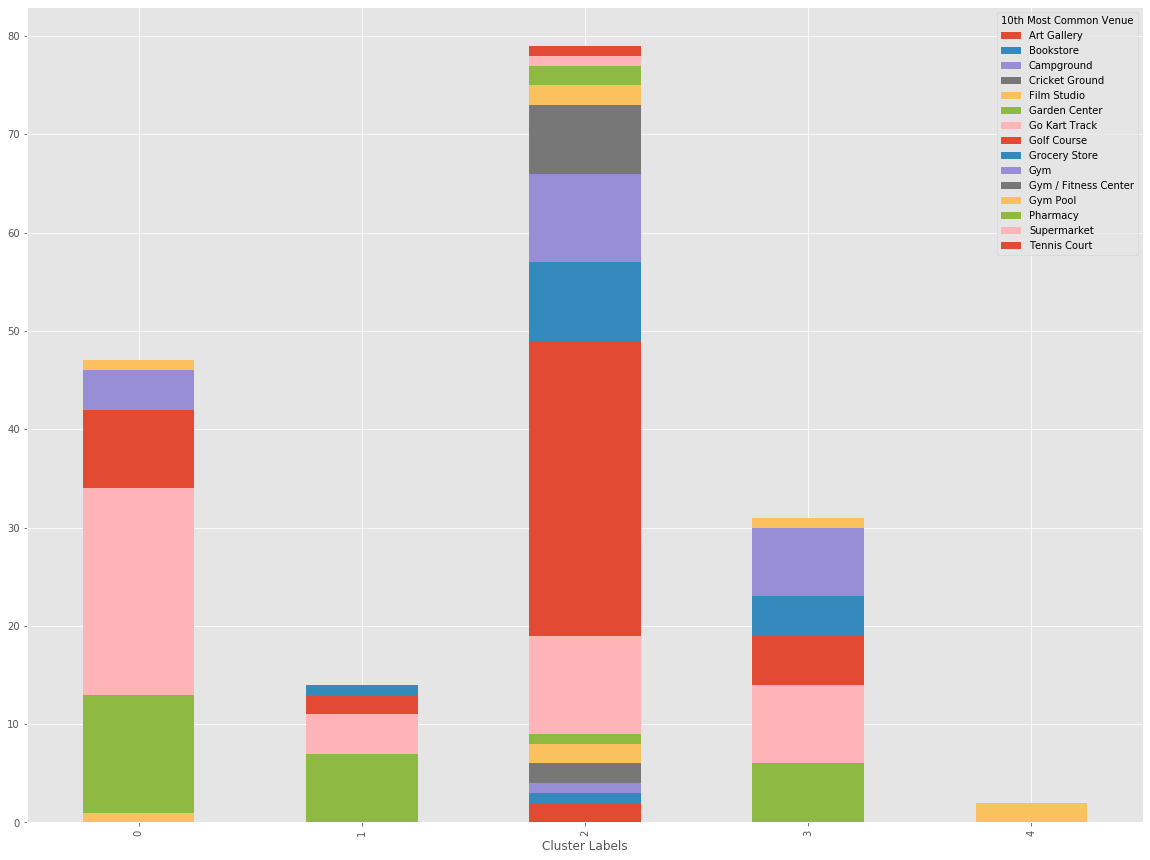

In [239]:
import matplotlib.pyplot as plt
import pandas as pd
London_merged.groupby(['Cluster Labels','10th Most Common Venue']).size().unstack().plot(kind='bar',stacked=True, figsize=(20,15))
plt.show()


# ondon_merged.columns[5:14]]

### __<font color=red> Choropleth map__ </fond> - Index of Multiple Deprivation by district

In [250]:
london_geo = r'london_sport.json'

In [251]:
# latitude = 51.509865
# longitude = -0.118092


#     GL_District_h,
# create map and display it
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)
map_clusters.choropleth(
       
    geo_data=london_geo,
#     data= GL_District_df, 
    data = LondonDistrict_df,
    columns=['District', 'Index of Multiple Deprivation'],
    key_on='feature.properties.name',
    fill_color='YlOrRd', 
    fill_opacity=0.9, 
    line_opacity=0.2,
    legend_name='Index of Multiple Deprivation'
)
map_clusters

#### Featue engineering - add a new feature to identify Wards that require Sports acctivities development

In [242]:
# Thsese are only Sports Facilities
SportsAndArts_Facility = ['Pool', 'Cricket Ground','Athletics & Sports','Cycle Studio', 'Playground', 'Tennis Court',
    'Volleyball Court','Performing Arts Venue','Recreation Center','Go Kart Track', 'Outdoors & Recreation','Sports Club','Soccer Field', 'Squash Court', 'Tennis Court', 
    'Hockey Field', 'Hockey Rink', 'Paintball Field', 'Rugby Pitch','Go Kart Track']

London_merged['SportsDevReq?'] = pd.np.where(London_merged[London_merged.columns[5:16]]
    .isin(SportsAndArts_Facility).any(1, skipna=True), 'N', 'Y')

#### List of Wards require Sprorts development

In [247]:
London_merged[London_merged['SportsDevReq?'] == 'Y']
London_merged.head()

,Ward,Latitude,Longitude,Index of Multiple Deprivation,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue,Constituency,District,Sub-Region,Homeless,Crime2019,District-SubRegion-Homeless-Crime,SportsDevReq?
2,Alibon,51.545772,0.149366,5045.475524,3,Metro Station,Supermarket,Sporting Goods Shop,Bus Stop,Grocery Store,Convenience Store,Yoga Studio,Event Space,Gym / Fitness Center,Gym,Golf Course,Go Kart Track,Garden Center,Film Studio,Cricket Ground,Cycle Studio,Home Service,Climbing Gym,Campground,Café,Barking,Barking and Dagenham,East,512,18530,"Barking and Dagenham,East,512,18530",Y
14,Bromley North,51.526360,-0.019450,3637.709360,3,Bus Stop,Art Gallery,Metro Station,Park,Convenience Store,Film Studio,Gym Pool,Gym / Fitness Center,Gym,Grocery Store,Golf Course,Go Kart Track,Garden Center,Event Space,IT Services,Cycle Studio,Cricket Ground,Climbing Gym,Campground,Café,Poplar and Limehouse,Tower Hamlets,East,437,32412,"Tower Hamlets,East,437,32412",Y
16,Brownswood,51.564320,-0.097509,9514.296000,2,Café,Grocery Store,Supermarket,Bus Stop,Climbing Gym,Yoga Studio,Film Studio,Gym Pool,Gym / Fitness Center,Gym,Golf Course,Go Kart Track,Garden Center,Cricket Ground,Event Space,Cycle Studio,IT Services,Convenience Store,Campground,Boxing Gym,Hackney North and Stoke Newington,Hackney,East,949,31702,"Hackney,East,949,31702",Y
18,Caledonian,51.538986,-0.118843,7044.887850,2,Café,Grocery Store,Supermarket,Gym,Bus Stop,Park,Yoga Studio,Film Studio,Gym Pool,Gym / Fitness Center,Golf Course,Go Kart Track,Garden Center,Cycle Studio,Event Space,IT Services,Cricket Ground,Convenience Store,Climbing Gym,Campground,Islington South and Finsbury,Islington,Central,223,27860,"Islington,Central,223,27860",Y
20,Canary Wharf,51.501395,-0.021620,15233.257703,2,Gym,Café,Park,Bookstore,Gym / Fitness Center,Grocery Store,Shopping Mall,Convenience Store,Yoga Studio,Film Studio,Gym Pool,Golf Course,Go Kart Track,Garden Center,Cycle Studio,Event Space,IT Services,Cricket Ground,Climbing Gym,Campground,Poplar and Limehouse,Tower Hamlets,East,437,32412,"Tower Hamlets,East,437,32412",Y
34,Clerkenwell,51.524973,-0.110151,10083.548973,2,Café,Theme Park Ride / Attraction,Bookstore,Gym / Fitness Center,Park,Yoga Studio,Film Studio,Gym Pool,Gym,Grocery Store,Golf Course,Go Kart Track,Garden Center,Cycle Studio,Event Space,IT Services,Cricket Ground,Convenience Store,Climbing Gym,Campground,Islington South and Finsbury,Islington,Central,223,27860,"Islington,Central,223,27860",Y
38,Dalston,51.546916,-0.072011,6723.154362,2,Café,Grocery Store,Convenience Store,Yoga Studio,Music Venue,Gym,Train Station,Bookstore,Boxing Gym,Campground,Golf Course,Home Service,Gym Pool,Athletics & Sports,Gym / Fitness Center,Go Kart Track,Climbing Gym,Garden Center,Film Studio,IT Services,Hackney North and Stoke Newington,Hackney,East,949,31702,"Hackney,East,949,31702",Y
39,De Beauvoir,51.541540,-0.080813,9859.301020,2,Café,Bookstore,Bus Stop,Gym / Fitness Center,Garden Center,Yoga Studio,Film Studio,Home Service,Gym Pool,Gym,Grocery Store,Golf Course,Go Kart Track,Cycle Studio,Event Space,Train Station,Cricket Ground,Convenience Store,Climbing Gym,Campground,Hackney South and Shoreditch,Hackney,East,949,31702,"Hackney,East,949,31702",Y
80,Hoe Street,51.584323,-0.014732,6169.457875,2,Café,Convenience Store,Art Gallery,Grocery Store,Train Station,Film Studio,Home Service,Gym Pool,Gym / Fitness Center,Gym,Golf Course,Go Kart Track,Garden Center,Cycle Studio,Event Space,Cricket Ground,Climbing Gym,Campground,Bus Stop,Boxing Gym,Walthamstow,Waltham Forest,East,586,22259,"Waltham Forest,E

In [248]:
# We already know that there is no significant difference between the Clusters - they are grouped in similar manner

# We can see from the below Cluster 4 has only two Wards
# Clusters
# 2    79
# 0    47
# 3    31
# 1    14
# 4     2

# We are going resdistribute Clusters Labels by allocating a separate cluster for the Wards require Sports Development so they can be easily identified in the map

# Assign the 2 wards in Cluster 4 to Cluter 1 which has 14 Wards
London_merged['Cluster Labels'] = np.where((London_merged['Cluster Labels'] == 4),1,London_merged['Cluster Labels'])
London_merged

# Assign the wards which require Sports development to Cluster 4 
London_merged['Cluster Labels'] = np.where((London_merged['SportsDevReq?'] == 'Y'),4,London_merged['Cluster Labels'])
London_merged

,Ward,Latitude,Longitude,Index of Multiple Deprivation,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue,Constituency,District,Sub-Region,Homeless,Crime2019,District-SubRegion-Homeless-Crime,SportsDevReq?
0,Abbey,51.539509,0.078658,6719.834101,0,Supermarket,Grocery Store,Metro Station,Gym,Park,Pharmacy,Yoga Studio,Event Space,Gym / Fitness Center,Golf Course,Go Kart Track,Garden Center,Film Studio,Cycle Studio,Home Service,Cricket Ground,Convenience Store,Climbing Gym,Campground,Café,Barking,Barking and Dagenham,East,512,18530,"Barking and Dagenham,East,512,18530",N
1,Abbey,51.539509,0.078658,6719.834101,0,Supermarket,Grocery Store,Metro Station,Gym,Park,Pharmacy,Yoga Studio,Event Space,Gym / Fitness Center,Golf Course,Go Kart Track,Garden Center,Film Studio,Cycle Studio,Home Service,Cricket Ground,Convenience Store,Climbing Gym,Campground,Café,Wimbledon,Merton,South,122,13384,"Merton,South,122,13384",N
2,Alibon,51.545772,0.149366,5045.475524,4,Metro Station,Supermarket,Sporting Goods Shop,Bus Stop,Grocery Store,Convenience Store,Yoga Studio,Event Space,Gym / Fitness Center,Gym,Golf Course,Go Kart Track,Garden Center,Film Studio,Cricket Ground,Cycle Studio,Home Service,Climbing Gym,Campground,Café,Barking,Barking and Dagenham,East,512,18530,"Barking and Dagenham,East,512,18530",Y
3,Barnsbury,51.537210,-0.111114,9783.516556,2,Grocery Store,Café,Supermarket,Music Venue,Park,Yoga Studio,Event Space,Gym / Fitness Center,Gym,Golf Course,Go Kart Track,Garden Center,Film Studio,Cycle Studio,Home Service,Cricket Ground,Convenience Store,Climbing Gym,Campground,Bus Stop,Islington South and Finsbury,Islington,Central,223,27860,"Islington,Central,223,27860",N
4,Beckton,51.513422,0.060282,8324.954198,0,Supermarket,Grocery Store,Gym / Fitness Center,Park,Yoga Studio,Event Space,Gym Pool,Gym,Golf Course,Go Kart Track,Garden Center,Film Studio,Cycle Studio,IT Services,Cricket Ground,Convenience Store,Climbing Gym,Campground,Café,Bus Stop,East Ham,Newham,East,1143,33403,"Newham,East,1143,33403",N
5,Becontree,51.554173,0.118678,5992.940217,0,Supermarket,Gym,Yoga Studio,Cycle Studio,Gym Pool,Gym / Fitness Center,Grocery Store,Golf Course,Go Kart Track,Garden Center,Film Studio,Event Space,Cricket Ground,IT Services,Convenience Store,Climbing Gym,Campground,Café,Bus Stop,Boxing Gym,Barking,Barking and Dagenham,East,512,18530,"Barking and Dagenham,East,512,18530",N
6,Bethnal Green,51.526413,-0.048409,5938.823171,2,Café,Grocery Store,Park,Convenience Store,Art Gallery,Gym / Fitness Center,Gym,Film Studio,Gym Pool,Golf Course,Go Kart Track,Garden Center,Cycle Studio,Event Space,IT Services,Cricket Ground,Climbing Gym,Campground,Bus Stop,Boxing Gym,Bethnal Green and Bow,Tower Hamlets,East,437,32412,"Tower Hamlets,East,437,32412",N
7,Bishop's,51.500541,-0.112471,10407.207668,2,Café,Event Space,Bookstore,Gym / Fitness Center,Skate Park,Grocery Store,Yoga Studio,Gym Pool,Gym,Golf Course,Go Kart Track,Garden Center,Film Studio,Cricket Ground,Cycle Studio,IT Services,Convenience Store,Climbing Gym,Campground,Bus Stop,Vauxhall,Lambeth,Central,467,33305,"Lambeth,Central,467,33305",N
8,Blackwall & Cubitt Town,51.501786,-0.006835,13388.076923,3,Bus Stop,Athletics & Sports,Tennis Court,Gym Pool,Yoga Studio,Event Space,Gym / Fitness Center,Gym,Grocery Store,Golf Course,Go Kart Track,Garden Center,Film Studio,Cricket Ground,Cycle Studio,IT Services,Convenience Store,Climbing Gym,Campground,Café,Poplar and Limehouse,Tower Hamlets,East,437,32412,"Tower Hamlets,East,437,32412",N
9,Boleyn,51.531005,0.041137,8061.456790,0,Gym / Fitness Center,Grocery Store,Y

In [252]:

London_merged.reset_index(drop = True)
London_merged.head()

,Ward,Latitude,Longitude,Index of Multiple Deprivation,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue,Constituency,District,Sub-Region,Homeless,Crime2019,District-SubRegion-Homeless-Crime,SportsDevReq?
0,Abbey,51.539509,0.078658,6719.834101,0,Supermarket,Grocery Store,Metro Station,Gym,Park,Pharmacy,Yoga Studio,Event Space,Gym / Fitness Center,Golf Course,Go Kart Track,Garden Center,Film Studio,Cycle Studio,Home Service,Cricket Ground,Convenience Store,Climbing Gym,Campground,Café,Barking,Barking and Dagenham,East,512,18530,"Barking and Dagenham,East,512,18530",N
1,Abbey,51.539509,0.078658,6719.834101,0,Supermarket,Grocery Store,Metro Station,Gym,Park,Pharmacy,Yoga Studio,Event Space,Gym / Fitness Center,Golf Course,Go Kart Track,Garden Center,Film Studio,Cycle Studio,Home Service,Cricket Ground,Convenience Store,Climbing Gym,Campground,Café,Wimbledon,Merton,South,122,13384,"Merton,South,122,13384",N
2,Alibon,51.545772,0.149366,5045.475524,4,Metro Station,Supermarket,Sporting Goods Shop,Bus Stop,Grocery Store,Convenience Store,Yoga Studio,Event Space,Gym / Fitness Center,Gym,Golf Course,Go Kart Track,Garden Center,Film Studio,Cricket Ground,Cycle Studio,Home Service,Climbing Gym,Campground,Café,Barking,Barking and Dagenham,East,512,18530,"Barking and Dagenham,East,512,18530",Y
3,Barnsbury,51.537210,-0.111114,9783.516556,2,Grocery Store,Café,Supermarket,Music Venue,Park,Yoga Studio,Event Space,Gym / Fitness Center,Gym,Golf Course,Go Kart Track,Garden Center,Film Studio,Cycle Studio,Home Service,Cricket Ground,Convenience Store,Climbing Gym,Campground,Bus Stop,Islington South and Finsbury,Islington,Central,223,27860,"Islington,Central,223,27860",N
4,Beckton,51.513422,0.060282,8324.954198,0,Supermarket,Grocery Store,Gym / Fitness Center,Park,Yoga Studio,Event Space,Gym Pool,Gym,Golf Course,Go Kart Track,Garden Center,Film Studio,Cycle Studio,IT Services,Cricket Ground,Convenience Store,Climbing Gym,Campground,Café,Bus Stop,East Ham,Newham,East,1143,33403,"Newham,East,1143,33403",N


#### Plot the Clusters

### You will see from the map that Cluster 4 is deicated to Wards that require Sports facilities development
#### The Popup labels have the following info for each Ward
##### Name of the Ward, Cluster label, SportsDevReq? Y/N along with District name

In [253]:
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# SportsAndArtsFacility
# add markers to the map
markers_colors = []
for lat, lon, poi, cluster, sport, dshc in zip(London_merged['Latitude'], London_merged['Longitude'], London_merged['Ward'], London_merged['Cluster Labels'], London_merged['SportsDevReq?'], London_merged['District-SubRegion-Homeless-Crime']):
    label = folium.Popup('Ward: '+ str(poi) +   ', Cluster: ' + str(cluster) + ', SportsDevReq?: ' + sport + ',     District-SubRegion-Homeless-Crime: '+ dshc ,  parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Results and Discussion <a name="results"></a>

I first found out the most deprived districts of London during Exploratory data analysis and created a choropleth map to display the London districts based on the Index of Multiple Deprivation values. The Darker areas are the prosperous districts while the light shaded ones are the deprived districts that we wanted to explore more to identify the most deprived neighbourhoods for development in London. 

I chose Sport development as the development type because of the following reasons.

Sports play a great role in family connections and social activities. It can help to motivate teenagers stay away from gang culture, increase employment opportunities, team work, and improve health. A lot of researches have shown that sport is a precious way to maintain physical health and has a close relationship with mental health and especially prevents mental disorders, anxiety, emotional and mental breakdowns and other disorders

By using Kmeans algorithm and Elbow method I found the optimal k value of 5 for the main data IMD,  and by using Foursquare data I then identified the top 20 venues (mostly Sports category) for each Ward in the deprived London districts. I created a new feature called SportsDevRequired?Y/N  and set a criteria for Sports development if there are no spots categories in the top 12 venues. After examining the clusters, I managed to assign wards that require Sports development to a dedicated Cluster (without affecting other Clusters). 
By doing do so, I have assigned a dedicated Cluster just for the wards that require Sports development, which can be easily identifiable in the map. 

I created a choropleth map with clusters for deprived London districts with the below information for each Ward:

1. Ward name
2. Cluster Label
3. IMD value
4. District
5. Sub-Region
6. Homeless
7. Crime

Though IMD is our main factor for identifying the deprived areas for development, the additional information, namely, Homelessness and Crime are very useful when prioritising the development work. For example, there are Wards in deprived districts, Hackney and Islington where Homelessness and Crime are high as well so they need urgent attention  

This study can be extended to include other development types (ex: Education) and a user-friendly Web portal can be built to assist the users




## Conclusion <a name="conclusion"></a>

As stated in the business problem section, the results and recommendation of the projects will be useful for Charities, NGOs and local authorities to identify 
most deprived neighbourhoods and initiate, organise and carry out appropriate development projects for the affected areas that need urgent attention.
